## **Machine learning (ML) in materials science**

The objective of this workshop is to use simple regression models to predict material properties such as

*   Shear modulus
*   Formation energy and
*   Band gap

by using the database available on data repositories such as Matbench (https://hackingmaterials.lbl.gov/automatminer/datasets.html#accessing-the-ml-tasks%20MatBench%20v0.1%20benchmark%20%E2%80%94%20Automatminer%201.0.3.20200727%20documentation).

We will try to  achieve the objective in ten distinct steps

1.   Download the JSON file and convert it into a dataframe
2.   Check for NAN values
1.   Generate the composition based feature vector
2.   Split the dataset into training and testing sets
1.   Scale and normalize the features
2.    Construct the correlation matrix
1.   Visualize the target variable
1.   Train simple ML models
2.   Plot and visualize the results

## 1. Load the downloaded JSON file and store it in a dataframe

In [ ]:
pip install gdown

In [ ]:
pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 45.9 MB/s eta 0:00:00


In [ ]:
!gdown 1ie91WlCkyZc-kYtPhaUlRWq9oZxGXPWU

Downloading...
From: https://drive.google.com/uc?id=1ie91WlCkyZc-kYtPhaUlRWq9oZxGXPWU
To: /content/bg_10000.csv
100% 295k/295k [00:00<00:00, 23.4MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [ ]:
PATH = os.getcwd()
data_path = os.path.join(PATH, 'bg_10000.csv')
df_bg = pd.read_csv(data_path)
print(f'Original DataFrame shape: {df_bg.shape}')

Original DataFrame shape: (10000, 3)


## 2. Check for NAN values

In [ ]:
rename_dict = {'jid': 'ID',
               'composition': 'formula',
               'target':'target'}
df = df_bg.rename(columns=rename_dict)
df.columns

Index(['ID', 'formula', 'target'], dtype='object')

In [ ]:
df2 = df.copy()
bool_nans_formula = df2['formula'].isnull()
bool_nans_ID = df2['ID'].isnull()
bool_nans_bg = df2['target'].isnull()

In [ ]:
df2 = df2.drop(df2.loc[bool_nans_formula].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_ID].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_bg].index, axis=0)

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print(f'DataFrame shape after dropping NaNs: {df2.shape}')

DataFrame shape before dropping NaNs: (10000, 3)
DataFrame shape after dropping NaNs: (10000, 3)


## 3. Generate the composition based feature vector

To featurize the chemical compositions from a chemical formula (e.g. "Al2O3") into a composition-based feature vector (CBFV), we use the open-source [`CBFV` package](https://github.com/kaaiian/CBFV). The default methodology to generate the features is 'Oliynyk'

#### i) Install CBFV

In [ ]:
pip install CBFV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 8.4 MB/s eta 0:00:00


In [ ]:
import os
# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

In [ ]:
X = df[['ID','formula']]
y = df['target']
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (10000, 2)
Shape of y: (10000,)


#### We will use the default featurization scheme 'oliynyk'

The `generate_features` function from the CBFV package expects an input DataFrame containing at least the columns `['formula', 'target']`.

In [ ]:
from CBFV import composition
from CBFV import *
X, y, formulae, skipped = composition.generate_features(df)

Processing Input Data: 100%|██████████| 10000/10000 [00:01<00:00, 6257.45it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 10000/10000 [00:04<00:00, 2319.27it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


Now let us take a look at the completely featurized dataframe

In [ ]:
X

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,33.333333,81.326058,3.333333,16.000000,6.666667,0.333333,0.666667,0.0,88.666667,1.000000,...,0.634,53.35,85.05,0.00143,0.12,0.22259,3.2698,0.02674,79.0,0.840
1,22.800000,52.234602,3.200000,13.200000,6.000000,0.400000,0.600000,0.0,72.600000,0.800000,...,0.634,53.35,85.05,0.00170,0.82,0.25520,3.2698,0.02790,79.0,0.840
2,67.111111,167.380356,5.555556,13.333333,5.333333,0.555556,0.444444,0.0,78.777778,1.111111,...,5.500,576.15,1262.95,6.24000,0.13,4.14200,52.5500,2.35000,182.0,1.880
3,20.250000,45.345076,3.500000,3.750000,1.750000,1.000000,0.000000,0.0,19.000000,0.000000,...,23.600,370.95,1156.15,0.97100,1.23,2.59800,96.9600,141.00000,109.0,1.113
4,32.931034,76.654590,4.103448,10.172414,4.551724,1.000000,0.000000,0.0,63.827586,1.448276,...,8.300,933.15,2740.15,2.70000,0.90,10.79000,293.4000,237.00000,326.0,3.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40.666667,95.720350,4.666667,7.666667,4.000000,1.000000,0.000000,0.0,52.333333,2.000000,...,8.100,302.95,2235.15,5.90000,0.17,5.59000,226.0000,7.82000,281.0,2.810
9996,13.888889,29.989214,2.555556,14.444444,6.555556,0.111111,0.888889,0.0,79.666667,1.000000,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.620
9997,16.875000,36.771792,3.250000,2.750000,2.125000,1.000000,0.000000,0.0,65.062500,0.062500,...,10.600,922.15,1363.15,1.74000,1.02,8.95400,127.4000,156.00000,148.0,1.510
9998,15.562500,33.198225,3.250000,2.312500,2.187500,1.000000,0.000000,0.0,63.375000,0.250000,...,10.600,922.15,1363.15,1.74000,1.02,8.95400,127.4000,156.00000,148.0,1.510


## 4) Split the data frame into train and test set

#### We will use 80% of the data for training and 20% of the data for testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train_unsclaed, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RNG_SEED)
print(X_train_unsclaed.shape)
print(X_test_unscaled.shape)

(8000, 264)
(2000, 264)


## 5) Scale and Normalize the features

In a `StandardScaler` object:
* During the `fit` process, the statistics of the input data (mean and standard deviation) are computed.
* Then, during the `transform` process, the mean and standard deviation values calculated above are used to scale the data to having zero-mean and unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unsclaed)
X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_test = normalize(X_test)

## 6) Construct the correlation matrix

In [ ]:
columns = X.columns

df_training_target = pd.DataFrame(np.array(y_train),columns=['target'])
df_training_data = pd.DataFrame(X_train,columns=columns)
df_testing_data = pd.DataFrame(X_test,columns=columns)
data_uncleaned = pd.concat([df_training_data,df_training_target],axis=1)

#data_uncleaned

In [ ]:
cor = data_uncleaned.corr('pearson')
cor

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,target
avg_Atomic_Number,1.000000,0.999011,0.973802,-0.262283,-0.384206,0.564476,-0.573372,0.122276,-0.298836,0.553609,...,0.581518,0.630939,0.763137,-0.231002,0.459745,0.533727,0.308278,0.171137,0.175682,-0.368079
avg_Atomic_Weight,0.999011,1.000000,0.964786,-0.263504,-0.380140,0.555048,-0.564023,0.120396,-0.297152,0.544125,...,0.571562,0.621547,0.755845,-0.221614,0.454135,0.525756,0.300036,0.165740,0.168718,-0.359349
avg_Period,0.973802,0.964786,1.000000,-0.318285,-0.469737,0.642250,-0.646425,0.128210,-0.389012,0.569714,...,0.635744,0.681613,0.775098,-0.294030,0.492781,0.578188,0.357579,0.201507,0.222400,-0.422716
avg_group,-0.262283,-0.263504,-0.318285,1.000000,0.822909,-0.695618,0.673344,-0.046092,0.736747,-0.061355,...,-0.488427,-0.503093,-0.385711,-0.238445,-0.323988,-0.487702,-0.396675,-0.207817,-0.083733,0.255315
avg_families,-0.384206,-0.380140,-0.469737,0.822909,1.000000,-0.872759,0.853061,-0.081222,0.847336,-0.150067,...,-0.526649,-0.568243,-0.488469,0.161544,-0.348647,-0.534067,-0.498106,-0.228872,-0.233065,0.445054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mode_heat_of_vaporization_(kJ/mol)_,0.533727,0.525756,0.578188,-0.487702,-0.534067,0.667393,-0.716606,0.250168,-0.426292,0.487496,...,0.923250,0.966752,0.775500,-0.101852,0.740201,1.000000,0.637268,0.650018,0.594644,-0.387981
mode_thermal_conductivity_(W/(m_K))_,0.308278,0.300036,0.357579,-0.396675,-0.498106,0.574946,-0.574313,0.093972,-0.293779,0.155845,...,0.603850,0.628926,0.541247,-0.042261,0.507188,0.637268,1.000000,0.284692,0.255837,-0.293554
mode_heat_atomization(kJ/mol),0.171137,0.165740,0.201507,-0.207817,-0.228872,0.260928,-0.312730,0.195248,-0.214095,0.405512,...,0.626668,0.605675,0.411891,-0.065876,0.540311,0.650018,0.284692,1.000000,0.943029,-0.274243
mode_Cohesive_energy,0.175682,0.168718,0.222400,-0.083733,-0.233065,0.259891,-0.303317,0.171840,-0.230235,0.428524,...,0.577285,0.552856,0.377462,-0.334950,0.497230,0.594644,0.255837,0.943029,1.000000,-0.313482


### (i) Get the set of features that are completely independent

We select the upper triangle of the correlation matrix and remove the features with correlation greater than 0.95

In [ ]:
# get upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# drop highly correlated features
data_uncleaned.drop(to_drop, axis=1, inplace=True)

<ipython-input-26-a181d738a575>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))


In [ ]:
# Correlation matrix with indenpendent features ( we have removed the highly correlated ones)
data_uncleaned

,avg_Atomic_Number,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,avg_Atomic_Radius,avg_Miracle_Radius_[pm],...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,target
0,-0.026938,-0.002391,0.040941,-0.019927,0.028585,-0.025159,0.008352,0.039288,-0.010099,-0.050123,...,-0.040508,-0.051432,-0.056728,-0.051892,-0.029360,-0.039860,-0.035956,0.148906,0.143859,1.6915
1,0.004874,-0.010755,0.000229,0.004968,0.000960,-0.015075,-0.014756,0.059888,0.011027,-0.012077,...,-0.019179,0.221354,0.154486,-0.003256,-0.008501,0.432288,0.076492,0.191322,0.178032,0.0000
2,-0.004440,-0.035671,-0.080150,0.084937,-0.075803,-0.014305,0.007815,0.015770,0.030327,0.051210,...,0.013563,0.012869,0.006977,0.054236,-0.014341,0.006135,0.063208,-0.051127,-0.045180,0.0000
3,-0.080089,-0.078104,-0.097961,0.032381,-0.023105,-0.020750,-0.136651,-0.084037,0.000978,-0.013103,...,0.198949,-0.004535,0.032640,-0.033567,0.070491,-0.017036,0.058936,-0.056881,-0.051088,1.4195
4,-0.006340,-0.020314,0.015278,0.006732,0.001300,-0.020427,-0.009890,0.045970,0.014491,-0.033355,...,-0.032890,-0.041759,-0.046059,-0.042133,-0.024118,-0.032363,-0.029194,0.120900,0.116803,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.059926,0.065047,0.035475,-0.039035,0.046931,-0.025352,0.037187,-0.010861,-0.058875,-0.009812,...,-0.044575,-0.052833,-0.056354,-0.052286,-0.006999,-0.041175,-0.036230,-0.007574,-0.000015,0.0000
7996,-0.086825,-0.050035,-0.054979,0.009059,0.001750,-0.027490,0.074116,-0.115664,-0.054264,-0.031568,...,-0.048335,-0.057289,-0.061107,-0.056696,-0.007589,-0.044648,-0.039286,-0.008213,-0.000016,2.4316
7997,-0.080570,-0.055858,-0.067215,0.008688,0.001678,-0.026364,-0.107306,-0.076874,-0.005411,-0.012348,...,-0.046354,-0.054942,-0.058604,-0.054373,-0.007278,-0.042819,-0.037677,-0.007877,-0.000016,3.8995
7998,-0.077974,0.062126,0.044431,-0.083141,0.088544,-0.023865,0.059389,-0.054793,-0.073876,-0.087691,...,-0.041961,-0.049735,-0.053049,-0.049219,-0.006588,-0.038761,-0.034106,-0.007130,-0.000014,4.8300


Now the number of features are reduced from 265 to 204

### (ii) Get the new correlation matrix to identify the features correlated with the target

**Remember we need to calculate the new correltion matrix with the new set of independent features**

In [ ]:
cor_new = data_uncleaned.corr('pearson')

### (iii) From the list of independent features choose the ones that are moderately/ highly correlated with the target

In [ ]:
cor_target =abs(cor_new["target"])
col_names = cor_new.columns
cor_list= cor_target.to_list()
relevant_feature_names = []
relevant_feature_index = []
for i,j in enumerate(cor_list):
    if j>0.45:
        relevant_feature_names.append(col_names[i])
        relevant_feature_index.append(i)
len(relevant_feature_names)

12

We now have a set of 17 features that are moderately or highly correlated with the target (i.e, GVRH). Let us print them.

In [ ]:
relevant_feature_names.remove('target')
relevant_feature_names

['avg_Metal',
 'avg_Nonmetal',
 'avg_Atomic_Radius',
 'avg_Gordy_electonegativity',
 'avg_Mulliken_EN',
 'avg_metallic_valence',
 'avg_Boiling_Point_(K)',
 'avg_Density_(g/mL)',
 'range_Mulliken_EN',
 'max_Pauling_Electronegativity',
 'max_Mulliken_EN']

### (iv) Visualize the relvant correlation matrix

Now let us print the correlation matrix with the 17 relevant features which will be used for the model construction

In [ ]:
Relevant_Corr_matrix = cor_new.loc[relevant_feature_names,relevant_feature_names]
Relevant_Corr_matrix

,avg_Metal,avg_Nonmetal,avg_Atomic_Radius,avg_Gordy_electonegativity,avg_Mulliken_EN,avg_metallic_valence,avg_Boiling_Point_(K),avg_Density_(g/mL),range_Mulliken_EN,max_Pauling_Electronegativity,max_Mulliken_EN
avg_Metal,1.000000,-0.934097,0.824399,-0.749407,-0.808989,0.709942,0.706756,0.680082,-0.577898,-0.696524,-0.666039
avg_Nonmetal,-0.934097,1.000000,-0.819433,0.770936,0.834673,-0.744947,-0.763493,-0.701073,0.613903,0.734860,0.707188
avg_Atomic_Radius,0.824399,-0.819433,1.000000,-0.796436,-0.852475,0.724941,0.744574,0.775355,-0.601182,-0.817213,-0.727474
avg_Gordy_electonegativity,-0.749407,0.770936,-0.796436,1.000000,0.911424,-0.750918,-0.689762,-0.567687,0.716928,0.861575,0.818212
avg_Mulliken_EN,-0.808989,0.834673,-0.852475,0.911424,1.000000,-0.729515,-0.731083,-0.641197,0.733918,0.854825,0.881769
avg_metallic_valence,0.709942,-0.744947,0.724941,-0.750918,-0.729515,1.000000,0.867732,0.851245,-0.747173,-0.791008,-0.738103
avg_Boiling_Point_(K),0.706756,-0.763493,0.744574,-0.689762,-0.731083,0.867732,1.000000,0.812968,-0.685684,-0.745899,-0.706286
avg_Density_(g/mL),0.680082,-0.701073,0.775355,-0.567687,-0.641197,0.851245,0.812968,1.000000,-0.675009,-0.731558,-0.665766
range_Mulliken_EN,-0.577898,0.613903,-0.601182,0.716928,0.733918,-0.747173,-0.685684,-0.675009,1.000000,0.861166,0.913576
max_Pauling_Electronegativity,-0.696524,0.734860,-0.817213,0.861575,0.854825,-0.791008,-0.745899,-0.731558,0.861166,1.000000,0.930974


Let us plot the above matrix in the form of a heat map for better visualization. High positive correlations are represented by dark blue colour and light yellow for high negative correlations

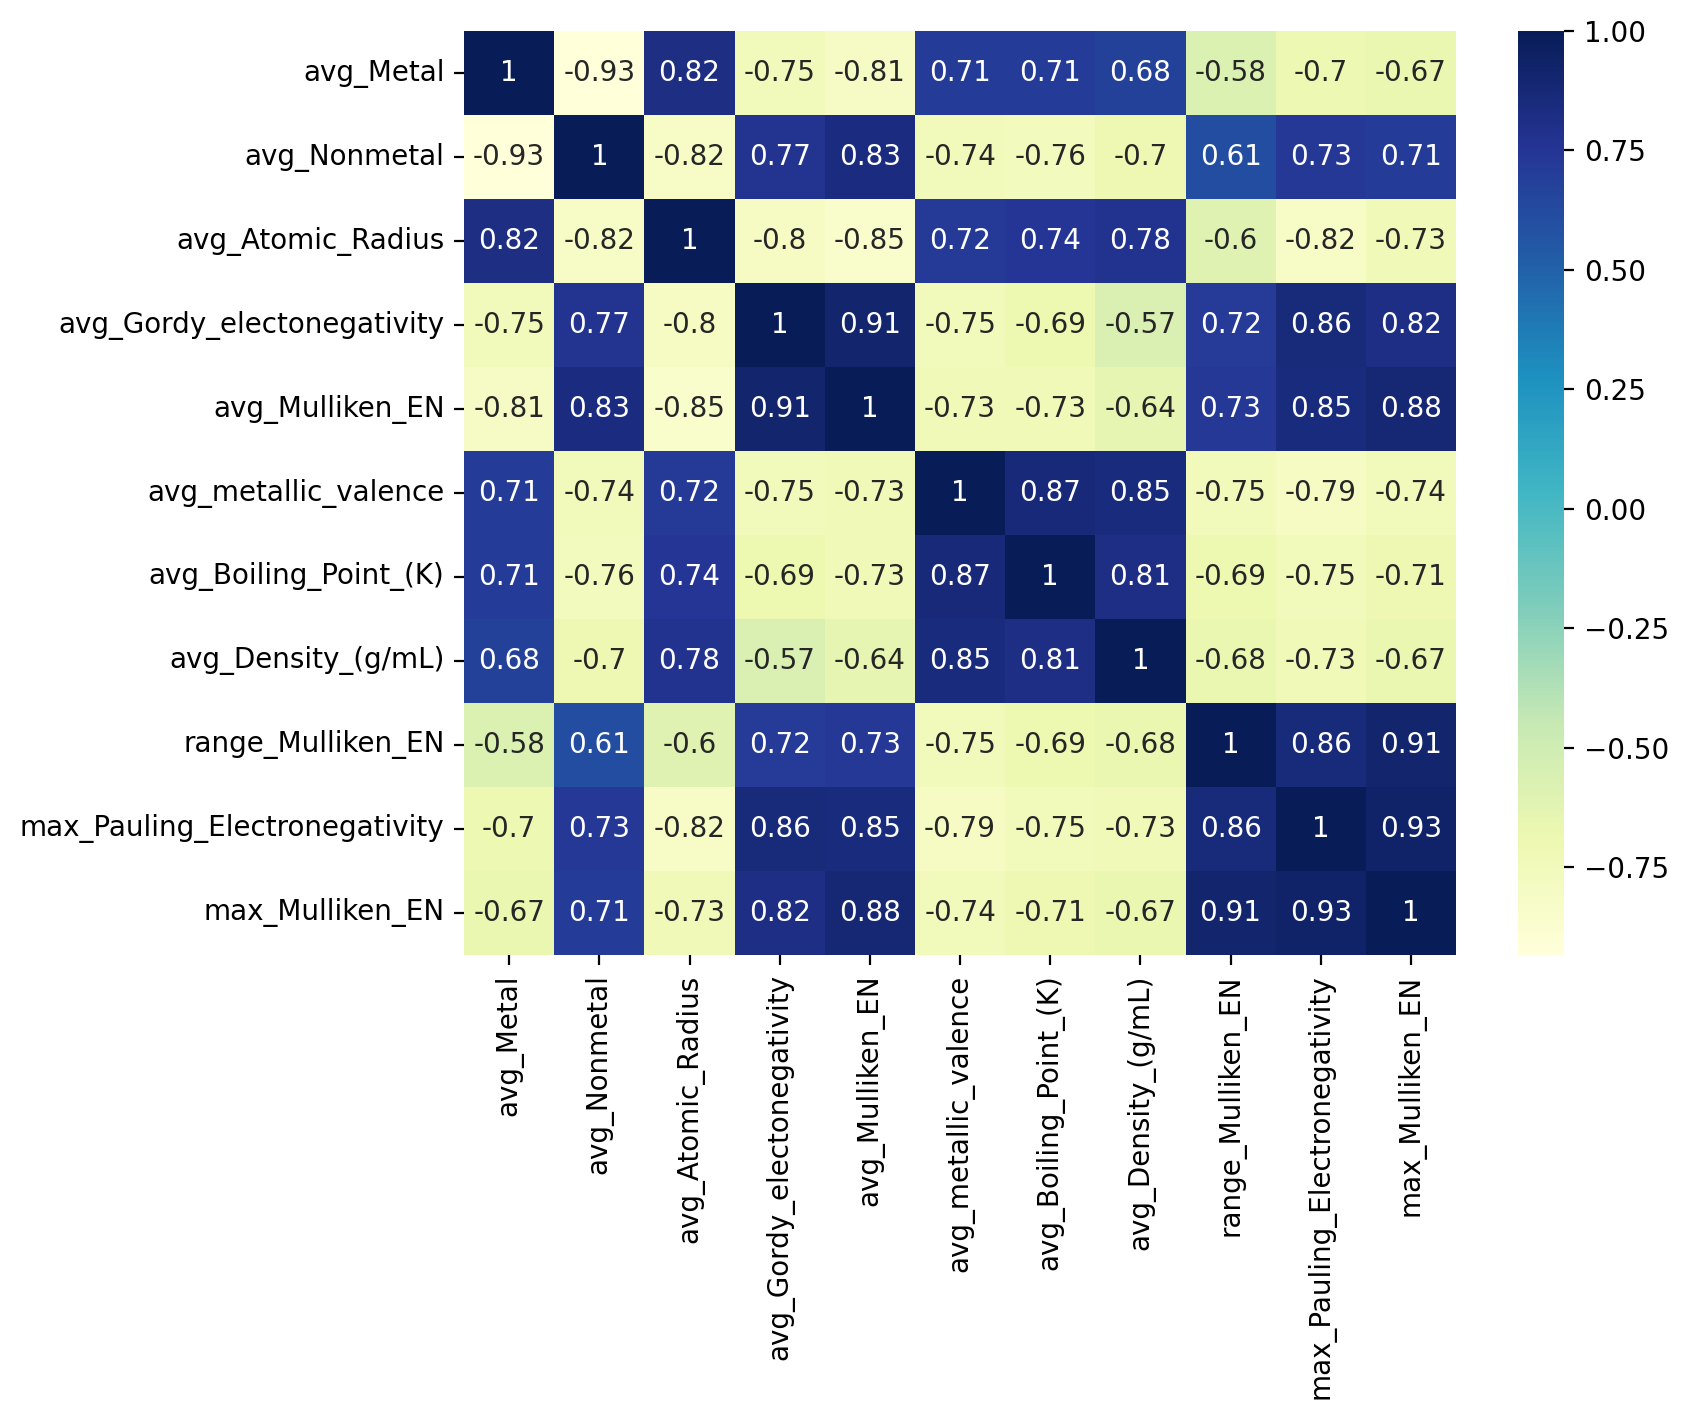

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams.update({'font.size':10})

# plotting correlation heatmap
dataplot = sb.heatmap(Relevant_Corr_matrix, cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

## 7) Visualize the target variable

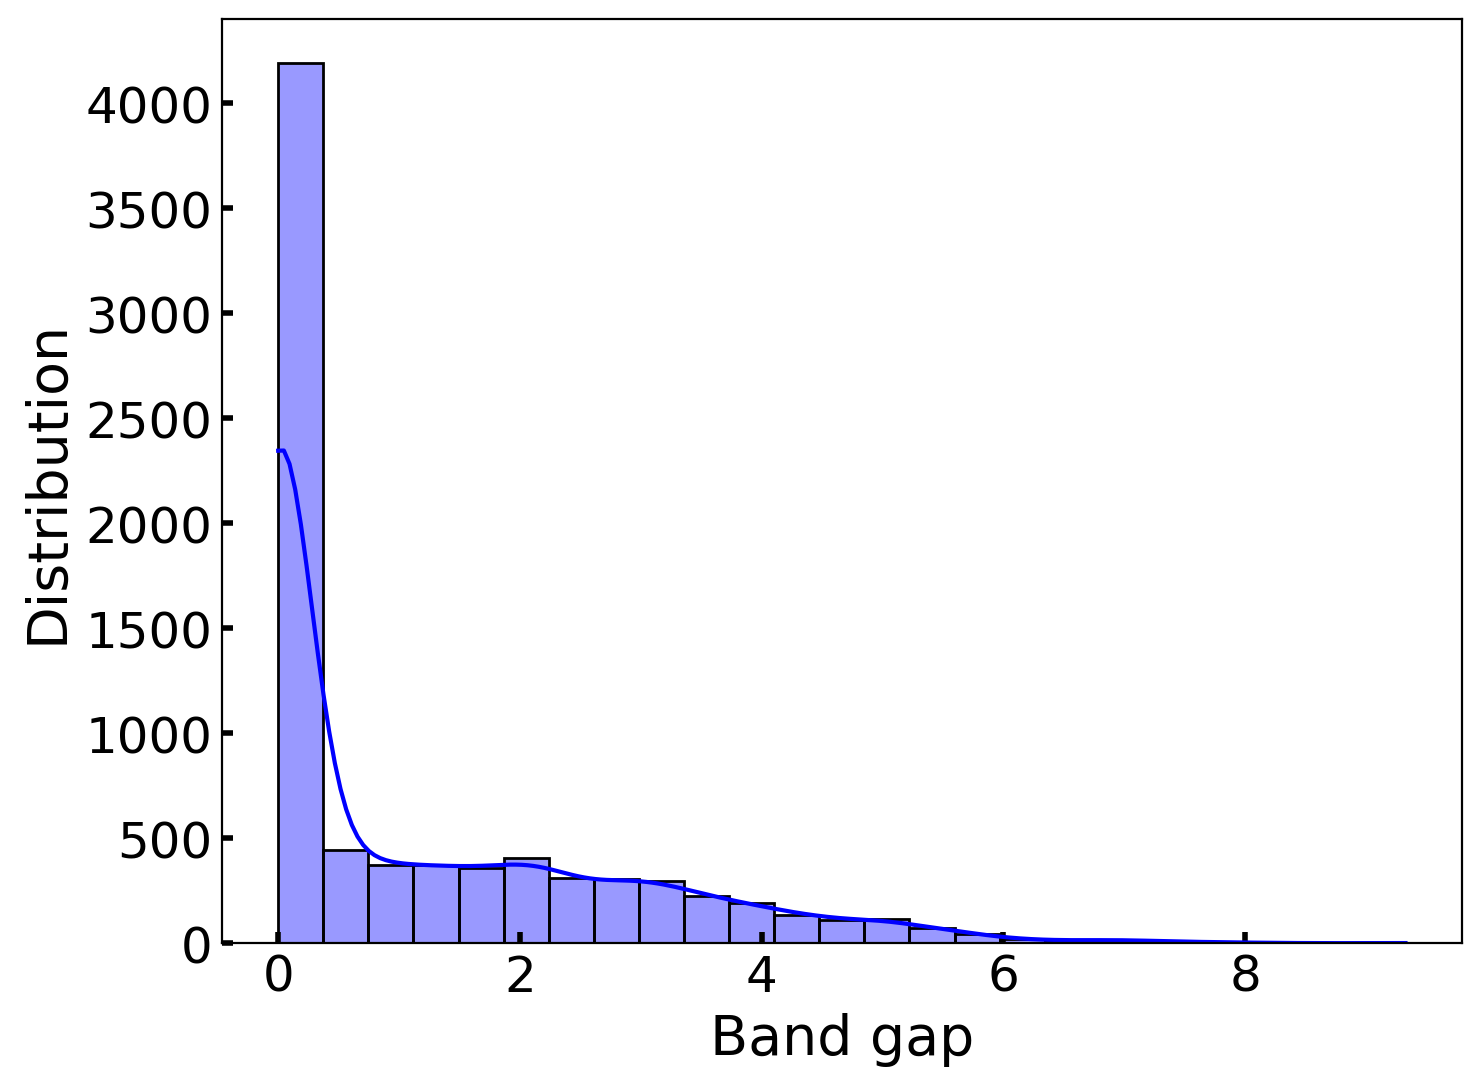

In [ ]:
import seaborn as sb
plt.figure(figsize = (8,6))
from matplotlib import pyplot as plt
sb.histplot(data_uncleaned['target'],kde = True,color='blue',alpha = 0.4,bins=25)
plt.tick_params(which='major',left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = True,direction="in",width = 2,length = 4)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Band gap',fontsize=20)
plt.ylabel('Distribution',fontsize=20)
plt.show()

#### Get the new dataframes with the relevant features for both training and testing

In [ ]:
X_train = df_training_data.loc[:,relevant_feature_names]
X_test =df_testing_data.loc[:,relevant_feature_names]

## 8) Train the dataset on simple regression models

We will use the following models


*  Ridge regression
*  Lasso regression
*  Random forest regressor
*  KNeighbours regressor
*  Support vector regressor




In [ ]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### i) Function for training and evaluating different models

In [ ]:
df_simple_reg = pd.DataFrame(columns=['model_name','model_name_pretty','model_params','fit_time','r2_train','mae_train',
                                    'rmse_train'])
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train


#### ii) Run all the models and obtain their performance metrics

We will loop through each of the models listed above. For each of the models, we will:
* instantiate the model (with default parameters)
* fit the model using the training data
* evaluate the performance of the model using the predictions
* store the results in a DataFrame for analysis

***Note: For a more robust analysis it is always advised to split the data into and training set, validation set and test set. The predictions of the trained model on the validation set and the corresponding performance metrics should be used to evaluate the model. We use only the training scores here considering the constraint in time***

In [ ]:
def model_train_eval(model,X_train,Y_train):
    #Fit the model
    t = time()
    model = model()
    model.fit(X_train,Y_train)
    time_to_fit = time()-t

    #Evaluate the model
    y_actual = Y_train
    y_predicted = model.predict(X_train)

    #Get the scores
    r2_Score = r2_score(y_actual,y_predicted)
    mae = mean_absolute_error(y_actual,y_predicted)
    rmse = mean_squared_error (y_actual,y_predicted,squared=False)

    #Results
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': time_to_fit,
        'r2_train': r2_Score,
        'mae_train': mae,
        'rmse_train': rmse}
    return result_dict

In [ ]:
# Build a dictionary of model names
from collections import OrderedDict
simple_reg_model_names = OrderedDict({
    'rr': Ridge,
    'lr': Lasso,
    'rfr': RandomForestRegressor,
    'svr': SVR,
    'knr': KNeighborsRegressor,
})

In [ ]:
simple_reg_models = OrderedDict()
# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in simple_reg_model_names.items():
    print(f'Currently running {model_name}: {model.__name__}')
    result_dict = model_train_eval(model, X_train_unsclaed, y_train)
    df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)

Currently running rr: Ridge


<ipython-input-45-cc8ddc0ad7a1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)


Currently running lr: Lasso


<ipython-input-45-cc8ddc0ad7a1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)


Currently running rfr: RandomForestRegressor


<ipython-input-45-cc8ddc0ad7a1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)


Currently running svr: SVR


<ipython-input-45-cc8ddc0ad7a1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)


Currently running knr: KNeighborsRegressor


<ipython-input-45-cc8ddc0ad7a1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)


Let us print the df_simple_reg and compare the training scores and time

In [ ]:
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train
0,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.206727,0.582044,0.760912,1.024695
1,lr,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3.080915,0.383653,0.923954,1.244348
2,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",124.903957,0.958101,0.200204,0.324439
3,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",10.408894,0.360537,0.848487,1.267468
4,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.011925,0.701285,0.529916,0.866278


In [ ]:
## Get the best fit model based on r2score
df_simple_reg = df_simple_reg.sort_values('r2_train', ignore_index=True)
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train
0,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",10.408894,0.360537,0.848487,1.267468
1,lr,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3.080915,0.383653,0.923954,1.244348
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.206727,0.582044,0.760912,1.024695
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.011925,0.701285,0.529916,0.866278
4,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",124.903957,0.958101,0.200204,0.324439


#### iii) Get the best perfoming model parameters

In [ ]:
# Get the parameters of the best performing model
best_r2score_train= df_simple_reg.iloc[-1, :].copy()
model = simple_reg_model_names[best_r2score_train['model_name']](**best_r2score_train['model_params'])
model.fit(X_train, y_train)

RandomForestRegressor()

Random forest regressor performs better here too in terms of $R^{2}$ score while training the dataset. Let us print the default model parameters used for training

In [ ]:
best_r2score_train['model_params']

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 9) Plot and visualize the results

#### i) Run the model on the test dataset
**(Note: You should do this only once)**

In [ ]:
y_act_test = y_test
y_pred_test = model.predict(X_test)


r2 = r2_score(y_act_test, y_pred_test)
mae = mean_absolute_error(y_act_test, y_pred_test)
rmse = mean_squared_error(y_act_test, y_pred_test, squared=False)

print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')


r2: 0.6020
mae: 0.6183
rmse: 0.9823


In [ ]:
def plot_pred_vs_act(act, pred, model, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])
    plot = plt.figure(figsize=(8,8))
    plt.plot(act, pred, 'o', ms=15, mec='b', mfc='silver', alpha=0.8)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    plt.axis('scaled')
    plt.xlabel(f'Actual',fontsize=16)
    plt.ylabel(f'Predicted',fontsize=16)
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}',fontsize=16)
    plt.legend(loc='upper left',fontsize=14)
    plt.tick_params(which='major',left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = True,direction="in",width = 2,length = 4)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    return plot

#### ii) Plot the predicted vs actual values and visualize them

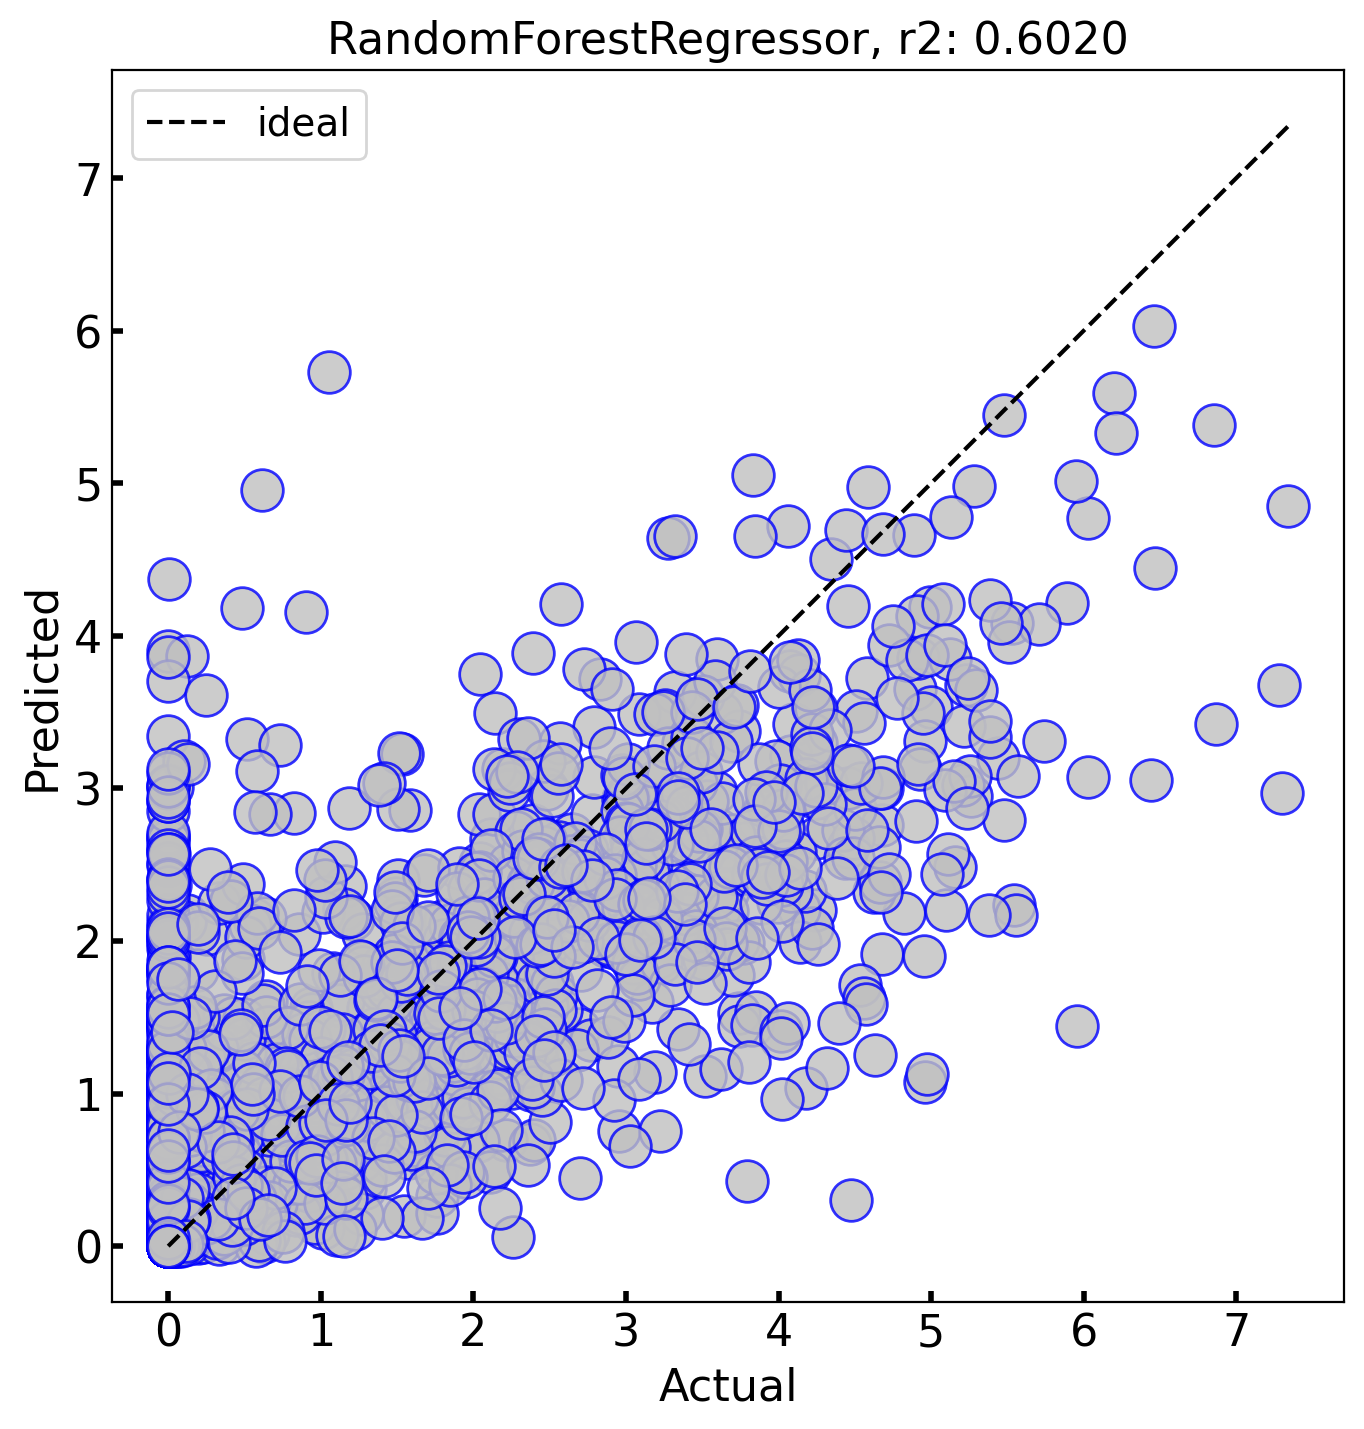

In [ ]:
plot = plot_pred_vs_act(y_act_test, y_pred_test, model)

## 9) Hyperparameter tuning

### i) Use GridSearchCV to find the best hyperparameters for the best performing model

GridSearchCV is a cross-validation technique for finding the optimal parameter values from a given set of parameters in a grid.

***Note: Sometimes the default parameters of the model can themselves perform better***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [None,'sqrt', 'log2'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [None, 3, 6, 9],
}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': [None, 'sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [ ]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [ ]:
RFR_best_mode_params = RandomForestRegressor(max_depth=9,
                                    max_features="sqrt",
                                    max_leaf_nodes=9,
                                    n_estimators=100)
RFR_best_mode_params.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)

In [ ]:
r2_new = r2_score(y_act_test, y_pred_grid)
r2_new

0.7782722741099014

It can be seen that the default parameters used while training offer better performance in our case